# Assignment 3: EDA, Visualization, Regular Expressions, and SQL

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Collaborators**: *list  collaborators here*

## Scoring Breakdown

|Question|Points|
|---|---|
|1.1|10|
|1.2|10|
|1.3|10|
|1.4|10|
|2|30|
|3.1|10|
|3.2|10|
|3.3|10|
|**Total**|100|

Load the Food Safety datasets (bus.csv, ins2vio.csv, ins.csv, and vio.csv) into pandas dataframes and answer the following questions based on the dataframes.

In [86]:
#Load the datasets into Pandas DataFrames
import pandas as pd
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: EDA

Use the business dataset (bus) to answer the Part 1 questions.

### 1.1. Examining the entries in `bus`, is the `business id column` unique for each record (i.e. each row of data)?

Hint: use `value_counts()` or `unique()` to determine if the `bid` series has any duplicates.


In [87]:
busDF = pd.read_csv('bus.csv')


In [88]:
busDF.head(10)

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675
5,100036,Hula Truck (#2),2 Marina Blvd,San Francisco,CA,94123,-9999.000000,-9999.000000,-9999
6,100039,GENKI CREPES & MINI MART,330 CLEMENT ST,San Francisco,CA,94118,-9999.000000,-9999.000000,14155376414
7,100041,UNCLE LEE CAFE,3608 BALBOA ST,San Francisco,CA,94121,-9999.000000,-9999.000000,-9999
8,100055,Twirl and Dip,335 Martin Luther King Jr. Dr,San Francisco,CA,94118,-9999.000000,-9999.000000,14155300260
9,100058,SF PITA HUB,475 06TH ST,San Francisco,CA,94103,-9999.000000,-9999.000000,14155642006


In [89]:
busDF.shape


(6253, 9)

In [90]:
len(busDF["name"])

6253

In [91]:
len(busDF["business id column"].unique())




6253

## Rubric
### 2 points for using Dataframe
### 4 points for using "unique" or similar to check number of unique 'business id column'
### 4 points for either visually comparing or programatically comparing the unique rows with the size or number of records.

In [92]:

len(busDF["business id column"].unique()) == len(busDF["name"])

True

### 1.2. In the two cells below create the following **two numpy arrays**:

1. Assign `top_names` to the top 3 most frequently used business names, from most frequent to least frequent.
2. Assign `top_addresses` to the top 3 addressses (not city or state or zip) where businesses are located.

Hint: you may find `value_counts()` helpful. 

## Rubric
  
### 4 points - printing of the top 3 names Peet's Coffee & Tea" 'Starbucks Coffee' "McDonald's" 'Jamba Juice'
####             printing of the top 3 addresses: Off The Grid, 428 11th St, 3251 20th Ave  
####             If the top 3 looks very different because of some very aggressive data cleaning and transformation, then give the full 4 points.

####
#### breakdown of the 4 points: 2 points - printing of the top names, printing of the top 3  addresses: 
####                            2 points for (each) printing the “unique” top business names, and addresses



#### 2 points of using numpy array 
#### 2 points for using a variable named top_names, top_addresses
#### 2 point for doing extra data cleaning to find duplicate records that have similar names  --
####  not all the cleaning needs to be done

In [93]:
sortedBusNames = busDF["name"].sort_values()
sortedBusNames.head(5)

6082    #1 VERJUS CAVE, #2 VERJUS
24              100137 Cloud Club
2497            111 Minna Gallery
2751       12 Tribes Kosher Foods
3609                  1428 Haight
Name: name, dtype: object

In [94]:
bus_Df_names_val = sortedBusNames.value_counts()[0:4]
bus_Df_names_val

name
Peet's Coffee & Tea    20
Starbucks Coffee       13
McDonald's             10
Jamba Juice            10
Name: count, dtype: int64

In [95]:
top_names = np.array(bus_Df_names_val.index)
print(top_names)


["Peet's Coffee & Tea" 'Starbucks Coffee' "McDonald's" 'Jamba Juice']


In [96]:
# If the student explored the data, they might see variations with the name
busDF[busDF["name"].str.startswith('Peet')]

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
349,1125,"Peet's Coffee & Tea, Inc",022 Battery St,San Francisco,CA,94111,37.791554,-122.399565,-9999
470,1493,Peet's Coffee & Tea,1 Ferry Building C3,San Francisco,CA,94111,37.795184,-122.393819,-9999
495,15752,Peet's Coffee & Tea,2 Embarcadero Center #R2113,San Francisco,CA,94111,37.794818,-122.398474,-9999
565,17822,Peet's Coffee & Tea,601 Van Ness Ave Suite A,San Francisco,CA,94102,37.781454,-122.420644,-9999
713,2077,Peet's Coffee & Tea,2139C Polk St,San Francisco,CA,94109,37.796316,-122.421909,-9999
821,24431,Peet's Coffee & Tea,692 Mission St,San Francisco,CA,94105,37.786584,-122.401639,-9999
991,29312,Peet's Coffee & Tea,310 Broderick St,San Francisco,CA,94117,37.773348,-122.439147,-9999
1097,32578,Peet's Coffee & Tea,1 California St,San Francisco,CA,94111,37.793614,-122.396517,-9999
1098,32579,Peet's Coffee & Tea,5201 Geary Blvd,San Francisco,CA,94118,37.780443,-122.475259,-9999
1118,32823,Peet's Coffee & Tea,405 Howard St,San Francisco,CA,94104,37.789057,-122.395322,-9999


In [97]:
len(busDF[busDF["name"].str.startswith('Peet')]["name"])

26

In [98]:
busDF[busDF["name"].str.startswith('Starbuck')]

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
350,1127,Starbucks Coffee,555 California St,San Francisco,CA,94104,37.792773,-122.403567,-9999
433,1368,Starbucks Coffee,701 Battery St,San Francisco,CA,94111,37.797754,-122.400925,-9999
454,1444,Starbucks Coffee,1560 Van Ness Ave,San Francisco,CA,94111,37.790086,-122.422167,-9999
473,1505,Starbucks Coffee Company #6765,359 Grant Ave,San Francisco,CA,94108,37.790376,-122.405544,-9999
507,1615,Starbucks Coffee,27 Drumm St,San Francisco,CA,94111,37.794184,-122.396524,-9999
511,16286,Starbucks Coffee (Store #9743),425 Battery St,San Francisco,CA,94111,37.795366,-122.400435,-9999
594,18399,Starbucks,3735 Buchanan St,San Francisco,CA,94123,37.804444,-122.433625,-9999
668,19403,Starbucks,499 Bay St,San Francisco,CA,94133,37.805493,-122.414407,-9999
669,19416,Starbucks,865 Market St C26,San Francisco,CA,94103,37.784317,-122.407563,14155604908
670,19417,Starbucks,5 03rd St,San Francisco,CA,94103,37.787569,-122.403349,-9999


In [99]:
import re

def removeNumbers(columnData):
    pattern = r"#\d+"
    replaced = columnData.str.replace(pattern, '', regex=True)
    return replaced

# test the function
serStarbucksRegularExpression = pd.Series(['Starbucks Coffee Company #25428'])
       
serStarbucksRegularExpression



0    Starbucks Coffee Company #25428
dtype: object

In [100]:
def canonicalize_starbucks(columnData):
    return (
        columnData.str
        .lower()               # lower case
        .replace(' ', '')      # remove 
        .replace('starbucks coffee company', 'starbucks')      # remove 
        .replace('starbucks coffee co', 'starbucks')      # remove 
        .replace('starbucks coffee', 'starbucks')   # replace 
    )


canonicalize_starbucks(pd.Series(['Starbucks Coffee Company']))


0    starbucks
dtype: object

In [101]:
canonicalize_starbucks(pd.Series(['Starbucks Coffee']))

0    starbucks
dtype: object

In [102]:

canonicalize_starbucks(pd.Series(['Starbucks Coffee Co']))

0    starbucks
dtype: object

In [103]:
busDF["name"] = removeNumbers(busDF["name"])


In [104]:
busDF["name"] = canonicalize_starbucks(busDF["name"])

In [105]:
def canonicalize_starbucks2(columnData):
    return (
        columnData.str
        .replace('starbucks coffee', 'starbucks')   # replace 
    )

In [106]:
busDF["name"] = canonicalize_starbucks2(busDF["name"])


In [107]:
def canonicalize_remove_blanks(columnData):
    return (
        columnData.str        
        .replace(' ', '')      # remove 
    )

In [108]:
busDF["name"] = canonicalize_remove_blanks(busDF["name"])

In [109]:
busDF[busDF["name"].str.startswith('starbuck')].head(20)

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
77,100476,starbucks,299 FREMONT ST,San Francisco,CA,94105,-9999.000000,-9999.000000,14156318705
338,1085,starbucks,333 MARKET St,San Francisco,CA,94105,37.792037,-122.397852,-9999
344,1103,starbucks,4094 18th St,San Francisco,CA,94114,37.760938,-122.434692,-9999
347,1122,starbucks,2132 CHESTNUT St,San Francisco,CA,94123,37.800547,-122.438494,-9999
350,1127,starbucks,555 California St,San Francisco,CA,94104,37.792773,-122.403567,-9999
351,11289,starbucks,280 KING STREET,San Francisco,CA,94107,37.776805,-122.393789,-9999
392,1265,starbucksco.,744 IRVING St,San Francisco,CA,94122,37.764088,-122.465981,14155850888
394,1269,starbucks,201 SPEAR St,San Francisco,CA,94105,37.790944,-122.392051,-9999
428,1359,starbucksco.,1750 DIVISADERO St,San Francisco,CA,94115,37.785907,-122.439957,-9999
433,1368,starbucks,701 Battery St,San Francisco,CA,94111,37.797754,-122.400925,-9999


In [110]:
busDF[busDF["name"].str.fullmatch(r'starbuck')]

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number


In [111]:
len(busDF[busDF["name"].str.startswith('starbuck')]["name"])

70

In [112]:
len(busDF[busDF["name"].str.startswith('McDon')]["name"])

0

In [113]:
len(busDF[busDF["name"].str.startswith('Jamba')]["name"])

0

In [114]:
# after fixing all the starbucks names
sortedBusNames = busDF["name"].sort_values()
sortedBusNames.head(5)
bus_Df_names_val = sortedBusNames.value_counts()[0:4]
bus_Df_names_val


name
starbucks           60
peet'scoffee&tea    25
subwaysandwiches    14
subway              13
Name: count, dtype: int64

In [115]:
top_names = np.array(bus_Df_names_val.index)
print(top_names)

['starbucks' "peet'scoffee&tea" 'subwaysandwiches' 'subway']


In [116]:
addressSorted = busDF["address"].sort_values()
valCountsOfAddress = addressSorted.value_counts()[0:4]
valCountsOfAddress

address
Off The Grid      39
428 11th St       34
3251 20th Ave     17
2948 Folsom St    17
Name: count, dtype: int64

In [117]:
type(valCountsOfAddress)

pandas.core.series.Series

In [118]:
type(valCountsOfAddress.index)

pandas.core.indexes.base.Index

In [119]:
top_addresses = np.array(valCountsOfAddress.index)
print(top_addresses)



['Off The Grid' '428 11th St' '3251 20th Ave' '2948 Folsom St']


In [120]:
type(top_addresses)

numpy.ndarray

In [121]:
# check if there are variations with the address
busDF[busDF["address"].str.startswith('Off')]

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
2387,64319,littlegreencyclollc,Off The Grid-Upper Haight,San Francisco,CA,-9999,37.777122,-122.419639,14155371657
2585,66817,casey'spizza,Off The Grid,San Francisco,CA,-9999,0.000000,0.000000,-9999
2639,67486,phatthai,Off The Grid,San Francisco,CA,-9999,37.777122,-122.419639,14155413331
2811,69122,hiyaaa!,Off The Grid,San Francisco,CA,-9999,0.000000,0.000000,-9999
2840,69312,elsurllc,Off The Grid,San Francisco,CA,-9999,0.000000,0.000000,14155300428
2892,69707,littlegreencyclo2,Off The Grid,San Francisco,CA,-9999,-9999.000000,-9999.000000,14155371657
2923,70044,mesohungry,Off The Grid,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
2975,70708,elcalamar,Off The Grid,San Francisco,CA,-9999,-9999.000000,-9999.000000,14155713080
3048,71581,sajj,Off the Grid,San Francisco,CA,-9999,-9999.000000,-9999.000000,14158893501
3051,71658,we2sushi,Off The Grid,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999


In [122]:
len(busDF[busDF["address"].str.startswith('Off')]['address'])

53

In [123]:
# check if there are variations with the address
busDF[busDF["address"].str.startswith('428')]
# here we can see that some folks entered as 11th St or 11 st or just 11th

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
272,101959,californiagarlicnoodles,428 11th St,San Francisco,CA,94103,-9999.000000,-9999.000000,-9999
283,102105,porkie,428 11th St,San Francisco,CA,94103,-9999.000000,-9999.000000,-9999
542,1726,kfc/tacobell,4285 MISSION St,San Francisco,CA,94112,37.728979,-122.431008,-9999
891,2676,firefly,4288 24th St,San Francisco,CA,94114,37.751068,-122.438242,14155827652
2838,69294,wesushi,428 11th,San Francisco,CA,-9999,37.770613,-122.412191,-9999
2878,69627,frozenkuhsterd,428 11th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155379050
2895,69737,streatcervezas,428 11th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155890933
2924,70045,johnnydoughnuts,428 11th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155525650
3130,74116,lafisheria,428 11th St,San Francisco,CA,94103,-9999.000000,-9999.000000,-9999
3140,74229,batterup,428 11th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155695605


### 1.3. In the following cell, construct a series that counts the number of businesses at each address that have likely MISSING postal code value (i.e. postal_code=-9999). Order the series in descending order by count.

In [124]:
busDF["postal_code"] == -9999

0       False
1       False
2       False
3       False
4       False
        ...  
6248    False
6249    False
6250    False
6251    False
6252    False
Name: postal_code, Length: 6253, dtype: bool

In [125]:
busDF[busDF["postal_code"].isna()]
# there are no Na columns.

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number


In [126]:
busDF[busDF["postal_code"] == '']
# tried another approach --- did not find any

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number


In [127]:
busDF[busDF["postal_code"].str.len() != 5 ]
# here we found some broken or mis-formatted data

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
68,100417,"compassone,llc",1 MARKET ST. FL,San Francisco,CA,94105-1420,-9999.000000,-9999.000000,14154324000
96,100660,teapenter,1518 IRVING ST,San Francisco,CA,94122-1909,-9999.000000,-9999.000000,14155868318
109,100781,lecafedusoleil,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999.000000,-9999.000000,14155614215
1822,5200,latinocuisineculinaryacademy,2929 19th St,San Francisco,CA,941102019,37.760373,-122.411153,14155645220
1824,5208,goldengateyachtclub,1 YACHT Rd,San Francisco,CA,941,37.807878,-122.442499,14155342628
2135,6029,alexisapartmentssr.mealsprogram,390 CLEMENTINA St,San Francisco,CA,941033148,-9999.000000,-9999.000000,-9999
2409,64540,leo'shotdogs,2301 Mission St,San Francisco,CA,CA,37.760054,-122.419166,14155774013
2418,64738,japacurry,Public,San Francisco,CA,CA,37.777122,-122.419639,-9999
4576,88139,tacolicious,2250 Chestnut St,San Francisco,CA,Ca,-9999.000000,-9999.000000,14155646077
6060,98376,bigcitymontessorischool,240 INDUSTRIAL ST,San Francisco,CA,94124-1917,-9999.000000,-9999.000000,14155388622


In [128]:
busDF[busDF["postal_code"].str.isdigit() == False ]

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
22,100126,lamasperuvianfoodtruck,Private Location,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
68,100417,"compassone,llc",1 MARKET ST. FL,San Francisco,CA,94105-1420,-9999.0,-9999.0,14154324000
96,100660,teapenter,1518 IRVING ST,San Francisco,CA,94122-1909,-9999.0,-9999.0,14155868318
109,100781,lecafedusoleil,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999.0,-9999.0,14155614215
156,101129,vendorroom200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
...,...,...,...,...,...,...,...,...,...
6078,98788,333truck,Off The Grid,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
6173,99369,hotelbiron,45 ROSE ST,San Francisco,CA,94102-5917,-9999.0,-9999.0,14155700403
6174,99376,mashallahhalalfoodtruckind,Off The Grid,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
6199,99536,faithsandwich,560 MISSION ST,San Francisco,CA,94105-2907,-9999.0,-9999.0,14155256783


In [129]:
busDF[(busDF["postal_code"].str.match(r'\d{5}') == False)  ]


,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
22,100126,lamasperuvianfoodtruck,Private Location,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
156,101129,vendorroom200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
177,101192,cochinita,2 Marina Blvd Fort Mason,San Francisco,CA,-9999,-9999.0,-9999.0,14150429222
276,102014,"dropbox(section3,floor7)",1800 Owens St,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
295,102245,vessellcaoperations(),2351 Mission St,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
...,...,...,...,...,...,...,...,...,...
5820,96774,danielscottripleycaterer,425 Barneveld Ave,San Francisco,CA,-9999,-9999.0,-9999.0,14155212714
5843,96938,pokereese,3251 Pierce,San Francisco,CA,-9999,-9999.0,-9999.0,14150463411
5940,97700,theitalianhomemadecompany,1 franklin Ct,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
6078,98788,333truck,Off The Grid,San Francisco,CA,-9999,-9999.0,-9999.0,-9999


In [130]:
busDF[busDF["postal_code"].str.match(r'\d{5}-\d{4}') == True ]

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
68,100417,"compassone,llc",1 MARKET ST. FL,San Francisco,CA,94105-1420,-9999.0,-9999.0,14154324000
96,100660,teapenter,1518 IRVING ST,San Francisco,CA,94122-1909,-9999.0,-9999.0,14155868318
109,100781,lecafedusoleil,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999.0,-9999.0,14155614215
6060,98376,bigcitymontessorischool,240 INDUSTRIAL ST,San Francisco,CA,94124-1917,-9999.0,-9999.0,14155388622
6173,99369,hotelbiron,45 ROSE ST,San Francisco,CA,94102-5917,-9999.0,-9999.0,14155700403
6199,99536,faithsandwich,560 MISSION ST,San Francisco,CA,94105-2907,-9999.0,-9999.0,14155256783
6241,99819,chestnutdiner,1312 CHESTNUT ST,San Francisco,CA,94123-3106,-9999.0,-9999.0,14155846236


In [131]:
busDF[busDF["postal_code"] == '-9999']

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
22,100126,lamasperuvianfoodtruck,Private Location,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
156,101129,vendorroom200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
177,101192,cochinita,2 Marina Blvd Fort Mason,San Francisco,CA,-9999,-9999.0,-9999.0,14150429222
276,102014,"dropbox(section3,floor7)",1800 Owens St,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
295,102245,vessellcaoperations(),2351 Mission St,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
...,...,...,...,...,...,...,...,...,...
5820,96774,danielscottripleycaterer,425 Barneveld Ave,San Francisco,CA,-9999,-9999.0,-9999.0,14155212714
5843,96938,pokereese,3251 Pierce,San Francisco,CA,-9999,-9999.0,-9999.0,14150463411
5940,97700,theitalianhomemadecompany,1 franklin Ct,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
6078,98788,333truck,Off The Grid,San Francisco,CA,-9999,-9999.0,-9999.0,-9999


In [132]:
missingZipSize = busDF[busDF["postal_code"] == '-9999'].groupby("address").size()

sortedZip = missingZipSize.sort_values(ascending=False)
sortedZip.head(10)
# this is the result without any fixes

address
Off The Grid                  39
Off the Grid                  10
OTG                            4
Approved Locations             3
Approved Private Locations     3
OFF THE GRID                   3
428 11th St                    2
Treasure Island                2
Justin Herman Plaza            2
625 Clement St                 1
dtype: int64

In [133]:
def canonicalize_column(columnData):
    return (
        columnData
        .lower()               # lower case
        .replace(' ', '')      # remove spaces
        .replace('&', 'and')   # replace &
        .replace('.', '')      # remove dot
    )

In [134]:
busDF['address_fix'] = busDF['address'].map(canonicalize_column)


In [135]:
missingZipSize = busDF[busDF["postal_code"] == '-9999'].groupby("address_fix").size()

sortedZip = missingZipSize.sort_values(ascending=False)
sortedZip.head(10)

address_fix
offthegrid                  54
approvedprivatelocations     4
otg                          4
approvedlocations            3
justinhermanplaza            2
treasureisland               2
42811thst                    2
610longbridge                1
6134gearyblvd                1
625clementst                 1
dtype: int64

In [136]:
def findMissingZip(zip):
    return [item == '-9999' or len(item) < 5 for item in zip.array]

In [137]:
busDF['postal_code'].array

<NumpyExtensionArray>
['94110', '94133', '94103', '94124', '94124', '94123', '94118', '94121',
 '94118', '94103',
 ...
 '94132', '94124', '94112', '94103', '94110', '94118', '94107', '94102',
 '94103', '94102']
Length: 6253, dtype: object

In [138]:
result = findMissingZip(busDF['postal_code'])

bad_zip = busDF[result]['postal_code']
bad_zip.array

<NumpyExtensionArray>
['-9999', '-9999', '-9999', '-9999', '-9999', '-9999', '-9999', '-9999',
 '-9999', '-9999',
 ...
 '-9999', '-9999', '-9999', '-9999', '-9999', '-9999', '-9999', '-9999',
 '-9999', '-9999']
Length: 198, dtype: object

In [139]:
if 'CA' in bad_zip.array:
    print('bad zip list contains CA')
else:
    print('bad zip does not contain CA')

bad zip list contains CA


In [140]:
if '941' in bad_zip.array:
    print('bad zip list contains 941')
else:
    print('bad zip does not contain 941')

bad zip list contains 941


In [141]:
missingZipSize = busDF[result].groupby("address_fix").size()

sortedZip = missingZipSize.sort_values(ascending=False)
sortedZip.head(10)

# 5 points for showing a list of address with the count
# 2 points for attempting to fix any of the addresses that seems duplicates
# 3 points for using any extra attempt for finding missing or bad zip codes - regular expression, malformed (CA or 941 ), or thru other methods
 

address_fix
offthegrid                  54
approvedprivatelocations     4
otg                          4
approvedlocations            3
42811thst                    2
justinhermanplaza            2
treasureisland               2
685marketst520               1
681broadwayst                1
66kearnyst                   1
dtype: int64

### 1.4 Look at the businesses that DO NOT have the special MISSING ZIP code value. Some of the invalid postal codes are just the full 9 digit code rather than the first 5 digits. Create a new column named `postal5` in the original bus dataframe which contains only the first 5 digits of the postal_code column. Finally, for any of the likely MISSING postal5 ZIP code entries set the entry to None.

5 points for checking the length of the zip code

2 points for checking that it is a digit.

2 points for setting to None, not the string "None"

1 point for testing for the changes


In [142]:
def truncateZip(zip):
    newzip = []
    for item in zip.array:
        if item is not None  and len(item) >= 5:
            firstFive = item[0:5]
            print(firstFive)
            if firstFive.isdigit():
                newzip.append(item[0:5])
            else:
                newzip.append
        else:
            newzip.append(item)
    return newzip

In [143]:
busDF[(busDF["postal_code"].str.len() == 9)  ]

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,address_fix
1822,5200,latinocuisineculinaryacademy,2929 19th St,San Francisco,CA,941102019,37.760373,-122.411153,14155645220,292919thst
2135,6029,alexisapartmentssr.mealsprogram,390 CLEMENTINA St,San Francisco,CA,941033148,-9999.000000,-9999.000000,-9999,390clementinast


In [144]:
def setToNone(zip):
    newzip = []
    for item in zip.array:
        if item == '-9999':
            newzip.append(None)
        else:
            newzip.append(item)
    return newzip


In [145]:

# you must set to the data type None, not the string "None"
busDF["postal_code"] = setToNone(busDF["postal_code"])

busDF["postal5"] = truncateZip(busDF["postal_code"])
busDF

94110
94133
94103
94124
94124
94123
94118
94121
94118
94103
94121
94134
94114
94103
94109
94124
94102
94103
94103
94132
94116
94121
94103
94107
94107
94123
94110
94105
94105
94105
94123
94102
94133
94103
94103
94123
94103
94121
94110
94108
94123
94134
94117
94118
94134
94102
94158
94103
94102
94118
94110
94103
94102
94112
94121
94110
94109
94114
94107
94127
94118
94158
94108
94103
94124
94103
94117
94105
94103
94117
94103
94118
94103
94114
94132
94124
94105
94114
94111
94110
94110
94122
94122
94109
94132
94117
94115
94103
94104
94123
94107
94123
94107
94110
94103
94122
94107
94114
94103
94103
94103
94103
94110
94131
94110
94102
94123
94108
94117
94110
94103
94103
94103
94105
94105
94110
94121
94116
94117
94111
94133
94121
94109
94133
94122
94124
94158
94123
94158
94110
94122
94108
94110
94158
94158
94158
94158
94158
94158
94158
94158
94158
94158
94518
94158
94158
94158
94158
94158
94158
94158
94158
94158
94158
94105
94109
94134
94158
94124
94103
94115
94124
94105
94109
94110
94133
9413

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,address_fix,postal5
0,1000,heungyuenrestaurant,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,327922ndst,94110
1,100010,illycaffesf_pier39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284,pier39k-106-b,94133
2,100017,amici'seastcoastpizzeria,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,47506thst,94103
3,100026,localcatering,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,1566carrollave,94124
4,100030,ouioui!macaron,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,2200jerroldavestec,94124
...,...,...,...,...,...,...,...,...,...,...,...
6248,99948,susiecakesbakery,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.000000,-9999.000000,14150452253,3509californiast,94118
6249,99988,hinodeyasoma,303 02nd ST STE 102,San Francisco,CA,94107,-9999.000000,-9999.000000,-9999,30302ndstste102,94107
6250,99991,tonton,422 GEARY ST,San Francisco,CA,94102,-9999.000000,-9999.000000,14155531280,422gearyst,94102
6251,99992,urbanexpresskitchensllc,475 06th ST,San Francisco,CA,94103,-9999.000000,-9999.000000,14150368085,47506thst,94103


In [146]:
busDF[busDF["name"].str.startswith('LATINO CUISINE CULINARY ACADEMY') ]


,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,address_fix,postal5


In [147]:
busDF[busDF["name"].str.startswith('ALEXIS APARTMENTS SR. MEALS PROGRAM') ]

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,address_fix,postal5


In [153]:
# did you prove that you removed them and set them to null?
busDF[busDF["postal_code"] == '-9999']


,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,address_fix,postal5


In [152]:
busDF[busDF["name"].str.startswith('Lamas') ]
# this one should not exists anymore
#type(busDF[busDF["name"].str.startswith('Lamas Peruvian Food Truck') ]["postal_code"].array[0])
# Lamas Peruvian Food Truck

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,address_fix,postal5


In [60]:
busDF[busDF["postal_code"].isnull()]

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,address_fix,postal5
22,100126,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,None,-9999.0,-9999.0,-9999,privatelocation,None
156,101129,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,None,-9999.0,-9999.0,-9999,1warriorswaylevel300southwest,None
177,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,None,-9999.0,-9999.0,14150429222,2marinablvdfortmason,None
276,102014,"DROPBOX (Section 3, Floor 7)",1800 Owens St,San Francisco,CA,None,-9999.0,-9999.0,-9999,1800owensst,None
295,102245,Vessell CA Operations (#4),2351 Mission St,San Francisco,CA,None,-9999.0,-9999.0,-9999,2351missionst,None
...,...,...,...,...,...,...,...,...,...,...,...
5820,96774,DANIEL SCOTT RIPLEY CATERER,425 Barneveld Ave,San Francisco,CA,None,-9999.0,-9999.0,14155212714,425barneveldave,None
5843,96938,POKE REESE,3251 Pierce,San Francisco,CA,None,-9999.0,-9999.0,14150463411,3251pierce,None
5940,97700,THE ITALIAN HOMEMADE COMPANY,1 franklin Ct,San Francisco,CA,None,-9999.0,-9999.0,-9999,1franklinct,None
6078,98788,333 Truck,Off The Grid,San Francisco,CA,None,-9999.0,-9999.0,-9999,offthegrid,None


## Part 2: Visualization

Using the four Food Safety datasets bus.csv, ins2vio.csv, ins.csv, and vio.csv:

2.Create a side-by-side boxplot like what you see in the figure that shows the distribution of the restaurant scores for each different risk category from 2017 to 2019. Use a figure size of at least 12 by 8.

Hint: Consider using appropriate JOIN operations.

30 points total

10 points for showing just the correct years, 2017 thru 2019.  

10 points for setting the figure size by 12 by 8

10 points for generating a box plot.


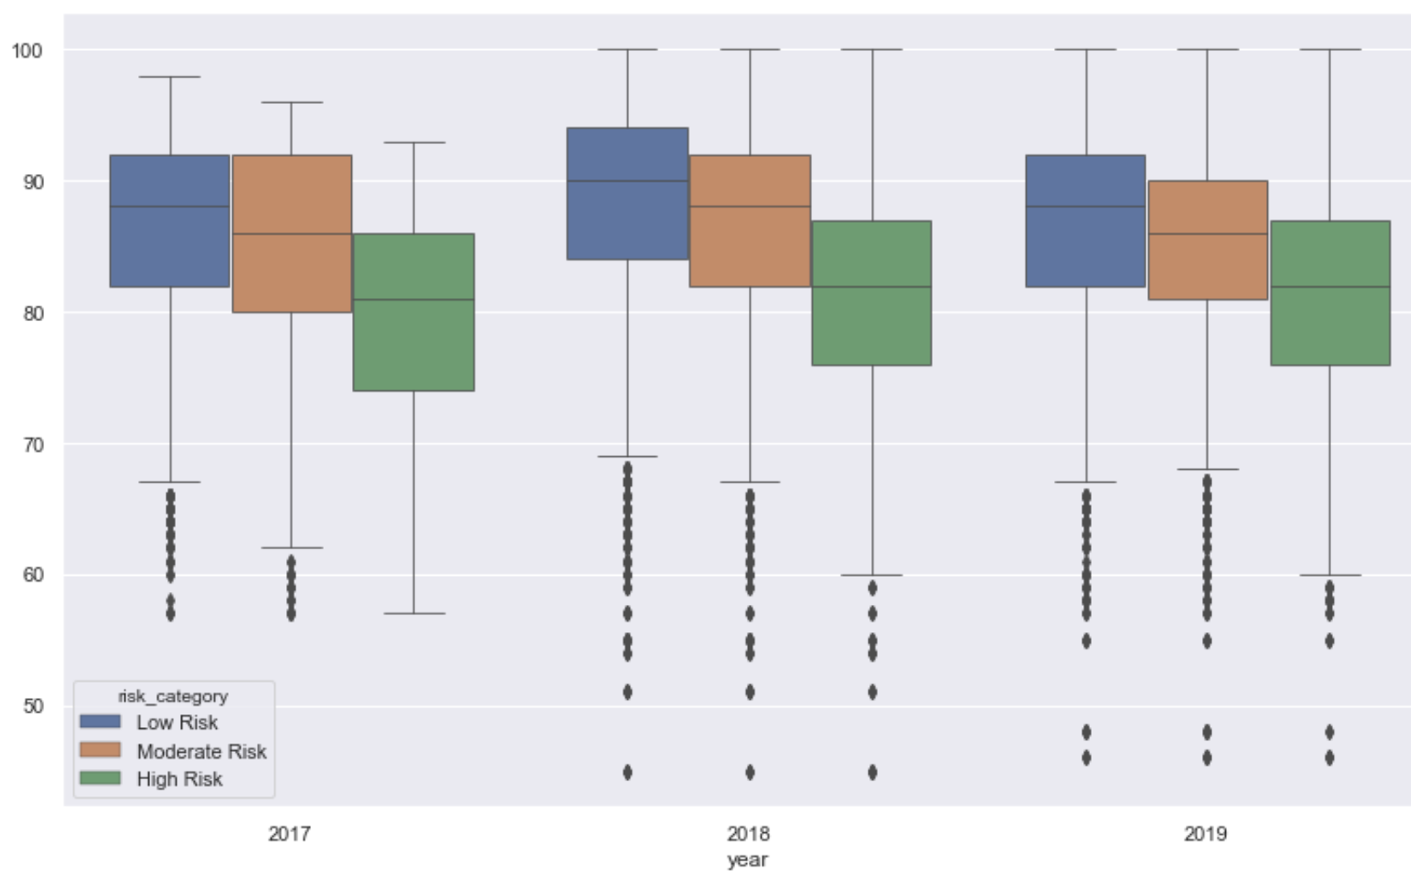

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

ins2viodf = pd.read_csv('ins2vio.csv')
insdf = pd.read_csv('ins.csv')
viodf = pd.read_csv('vio.csv')

In [62]:
insdf

,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup
...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled


In [63]:
viodf

,description,risk_category,vid
0,Consumer advisory not provided for raw or unde...,Moderate Risk,103128
1,Contaminated or adulterated food,High Risk,103108
2,Discharge from employee nose mouth or eye,Moderate Risk,103117
3,Employee eating or smoking,Moderate Risk,103118
4,Food in poor condition,Moderate Risk,103123
...,...,...,...
60,Unclean unmaintained or improperly constructed...,Low Risk,103152
61,Unpermitted food facility,Low Risk,103158
62,Unsanitary employee garments hair or nails,Low Risk,103136
63,Wiping cloths not clean or properly stored or ...,Low Risk,103149


In [64]:
ins2viodf

,iid,vid
0,97975_20190725,103124
1,85986_20161011,103114
2,95754_20190327,103124
3,77005_20170429,103120
4,4794_20181030,103138
...,...,...
40205,76958_20180919,103119
40206,80305_20190411,103149
40207,80233_20190417,103133
40208,100216_20190321,103119


In [65]:
dfmerge = insdf.merge(ins2viodf, on="iid")

In [66]:
dfmerge

,iid,date,score,type,vid
0,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,103105
1,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,103139
2,100030_20190612,06/12/2019 12:00:00 AM,-1,New Ownership,103142
3,100030_20190612,06/12/2019 12:00:00 AM,-1,New Ownership,103154
4,100030_20190826,08/26/2019 12:00:00 AM,-1,New Ownership,103149
...,...,...,...,...,...
40205,99_20180808,08/08/2018 12:00:00 AM,84,Routine - Unscheduled,103142
40206,99_20180808,08/08/2018 12:00:00 AM,84,Routine - Unscheduled,103133
40207,99_20180808,08/08/2018 12:00:00 AM,84,Routine - Unscheduled,103124
40208,99_20180808,08/08/2018 12:00:00 AM,84,Routine - Unscheduled,103156


In [67]:
dfmerge2 = dfmerge.merge(viodf, on="vid")
dfmerge2

,iid,date,score,type,vid,description,risk_category
0,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,103105,Improper cooling methods,High Risk
1,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,103105,Improper cooling methods,High Risk
2,100059_20190815,08/15/2019 12:00:00 AM,76,Routine - Unscheduled,103105,Improper cooling methods,High Risk
3,1000_20180523,05/23/2018 12:00:00 AM,76,Routine - Unscheduled,103105,Improper cooling methods,High Risk
4,100126_20190403,04/03/2019 12:00:00 AM,85,Routine - Unscheduled,103105,Improper cooling methods,High Risk
...,...,...,...,...,...,...,...
40205,90040_20170227,02/27/2017 12:00:00 AM,94,Routine - Unscheduled,103160,Inadequate HACCP plan record keeping,Low Risk
40206,91199_20170420,04/20/2017 12:00:00 AM,-1,New Ownership,103160,Inadequate HACCP plan record keeping,Low Risk
40207,91205_20170428,04/28/2017 12:00:00 AM,-1,New Ownership,103160,Inadequate HACCP plan record keeping,Low Risk
40208,9444_20190626,06/26/2019 12:00:00 AM,91,Routine - Unscheduled,103160,Inadequate HACCP plan record keeping,Low Risk


In [68]:
# Extract the year from the date column
#dfmerge2['year'] = pd.to_datetime(dfmerge2['date'], format="%d/%m/%Y %H:%M:S %p").dt.year
dfmerge2['year'] = pd.to_datetime(dfmerge2['date']).dt.year

/var/folders/m0/wj79nd7n7_j03g4gcc4pdlnc0000gn/T/ipykernel_44111/2911849198.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfmerge2['year'] = pd.to_datetime(dfmerge2['date']).dt.year


In [69]:
dfmerge2['year']

0        2019
1        2019
2        2019
3        2018
4        2019
         ... 
40205    2017
40206    2017
40207    2017
40208    2019
40209    2019
Name: year, Length: 40210, dtype: int32

/var/folders/m0/wj79nd7n7_j03g4gcc4pdlnc0000gn/T/ipykernel_44111/2931986895.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


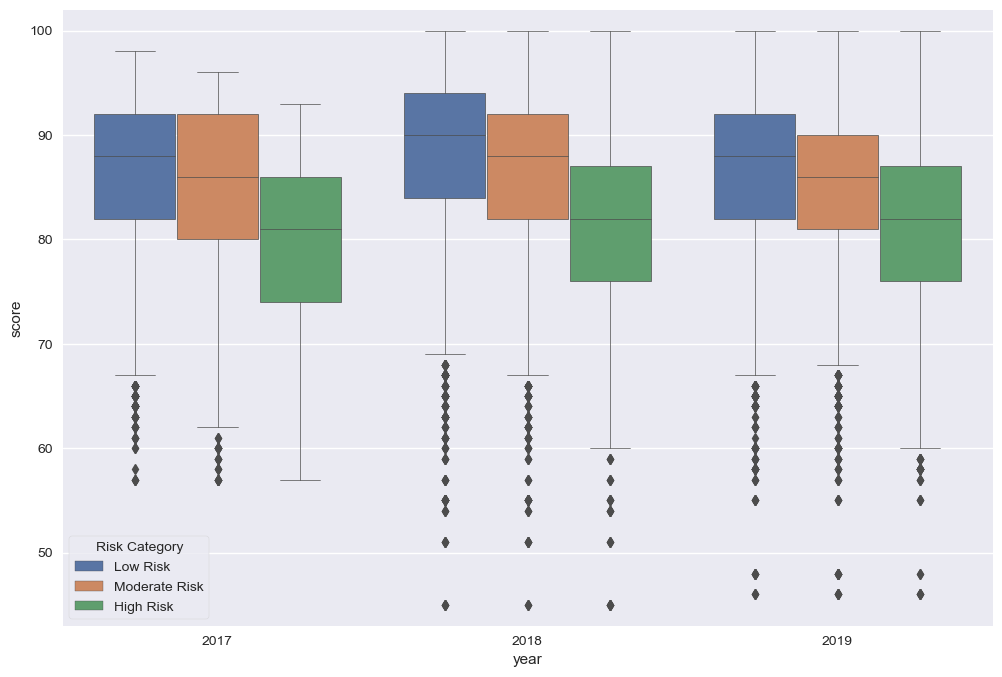

In [70]:


df_filtered = dfmerge2[(dfmerge2['year'] >= 2017) & (dfmerge2['year'] <= 2019)]
df_filtered = df_filtered[df_filtered['score'] != -1]

plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x='year', y='score', hue='risk_category', palette='deep', linewidth=0.5, hue_order=['Low Risk', 'Moderate Risk', 'High Risk']) 
plt.xticks([0, 1, 2], ["2017", "2018", "2019"])
plt.ylim(43, 102)
plt.yticks(range(50, 101, 10))
plt.legend(loc='lower left', frameon=True, title="Risk Category")
plt.show()

## Part 3: SQL

### 3.1 Create a database `CatDB` with the following schema:

CREATE TABLE owners (

ownerid integer,

name text,

age integer,

PRIMARY KEY (ownerid)

);


CREATE TABLE cats (

catid integer,

owner integer,

name text,

breed text,

age integer,

PRIMARY KEY (catid),

FOREIGN KEY (owner) REFERENCES owners);

In [71]:
# 8 points for creating a database, two tables, and inserting the test data
# extra 1 point for dropping the table if the table already exists.
# extra 1 point for dropping the cats table before the owner
# 2 points for testing that the tables exists by displaying the contents
import sqlite3

myconn = sqlite3.connect('CatsDB.db')

In [72]:
conn = sqlite3.connect('test.db') 
conn.executescript("""
DROP TABLE IF EXISTS cats;
DROP TABLE IF EXISTS owners;

CREATE TABLE owners (
ownerid integer,
name text,
age integer,
PRIMARY KEY (ownerid)
);

CREATE TABLE cats (
catid integer,
owner integer,
name text,
breed text,
age integer,
PRIMARY KEY (catid),
FOREIGN KEY (owner) REFERENCES owners);

INSERT INTO owners VALUES
    (1,'Sam',20),
    (2,'Joe',12),
    (3,'Jill',9),
    (4,'Sue',9);

INSERT INTO cats VALUES
    (1,1, 'Curly','Burmese', 20),
    (2,1, 'Sissy','ragdoll', 12),
    (3,3, 'Billy','Burmese',9),
    (4,3, 'Tiger','ragdoll',20),
    (5,2, 'Harry','shorthair', 12),
    (6,4, 'Dolly','Burmese',9),
    (7,4, 'Puffy','shorthair', 9);
""");

In [73]:
cursor_obj = myconn.cursor() 
statement = '''SELECT * FROM owners '''
cursor_obj.execute(statement) 

print("All the data") 
output = cursor_obj.fetchall() 
for row in output: 
  print(row) 
  
myconn.commit() 

All the data
(1, 'Sam', 20)
(2, 'Joe', 12)
(3, 'Jill', 9)
(4, 'Sue', 9)


In [74]:
cursor_obj = myconn.cursor() 
statement = '''SELECT * FROM cats'''
cursor_obj.execute(statement) 

print("All the data") 
output = cursor_obj.fetchall() 
for row in output: 
  print(row) 
  
myconn.commit() 

All the data
(1, 1, 'Curly', 'Burmese', 20)
(2, 1, 'Sissy', 'ragdoll', 12)
(3, 3, 'Billy', 'Burmese', 9)
(4, 3, 'Tiger', 'ragdoll', 20)
(5, 2, 'Harry', 'shorthair', 12)
(6, 4, 'Dolly', 'Burmese', 9)
(7, 4, 'Puffy', 'shorthair', 9)


### 3.2. Write a SQL query that returns the number of cats, over the age of 10, of each
breed of cat. **You get full credit if you use pandas dataframe and dataframe operations**

In [75]:
# this is the full sql solution
# 5 points for using a valid working SQL
# 3 points for either counting the rows, or using the count() function
# 2 points for showing the count of 4 
cursor_obj = myconn.cursor() 
statement = '''SELECT count(*) FROM cats where age > 10'''
cursor_obj.execute(statement) 

print("All the data") 
output = cursor_obj.fetchall() 
for row in output: 
  print(row) 
  
myconn.commit() 
  



All the data
(4,)


In [76]:
# sql with dataframe solution
# 5 points for reading all the cats into a dataframe
# 3 points for using dataframe filtering technique
# 2 points for showing the number of cats
df = pd.read_sql('SELECT * FROM cats', myconn)
df


,catid,owner,name,breed,age
0,1,1,Curly,Burmese,20
1,2,1,Sissy,ragdoll,12
2,3,3,Billy,Burmese,9
3,4,3,Tiger,ragdoll,20
4,5,2,Harry,shorthair,12
5,6,4,Dolly,Burmese,9
6,7,4,Puffy,shorthair,9


In [77]:
df [df['age'] > 10]

,catid,owner,name,breed,age
0,1,1,Curly,Burmese,20
1,2,1,Sissy,ragdoll,12
3,4,3,Tiger,ragdoll,20
4,5,2,Harry,shorthair,12


In [78]:
len(df [df['age'] > 10] ['age'])

4

### 3.3.  Write a SQL query that returns the ownerid/owner of the one cat owner who owns
the least cats. If more than one exists, return the youngest owner by age.  If more than one exists, then return first one alphabetically by owner's name. **You get full credit if you use pandas dataframe and dataframe operations**

In [79]:
# dataframe pandas approach
# 2 points for using pandas and almost no SQL
# 2 points for merging the two dataframes
# 2 points for using some groupby or other dataframe API to find the least cat owner.
# 2 points for showing owner name and ownerID or the calculated least owner
# 2 points for showing progress 
myconn = sqlite3.connect('CatsDB.db')
dfCats = pd.read_sql('SELECT * FROM cats', myconn)
dfCats

,catid,owner,name,breed,age
0,1,1,Curly,Burmese,20
1,2,1,Sissy,ragdoll,12
2,3,3,Billy,Burmese,9
3,4,3,Tiger,ragdoll,20
4,5,2,Harry,shorthair,12
5,6,4,Dolly,Burmese,9
6,7,4,Puffy,shorthair,9


In [80]:
ownersDF = pd.read_sql('SELECT * FROM owners', myconn)
ownersDF

,ownerid,name,age
0,1,Sam,20
1,2,Joe,12
2,3,Jill,9
3,4,Sue,9


In [81]:

catsownersDF = dfCats.merge(ownersDF, left_on='owner', right_on='ownerid')


In [82]:
catsownersDF

,catid,owner,name_x,breed,age_x,ownerid,name_y,age_y
0,1,1,Curly,Burmese,20,1,Sam,20
1,2,1,Sissy,ragdoll,12,1,Sam,20
2,3,3,Billy,Burmese,9,3,Jill,9
3,4,3,Tiger,ragdoll,20,3,Jill,9
4,5,2,Harry,shorthair,12,2,Joe,12
5,6,4,Dolly,Burmese,9,4,Sue,9
6,7,4,Puffy,shorthair,9,4,Sue,9


In [83]:
catsownersDF = catsownersDF.rename(columns={'name_y': 'ownerName', 'age_y': 'owner_age'})
catsownersDF

,catid,owner,name_x,breed,age_x,ownerid,ownerName,owner_age
0,1,1,Curly,Burmese,20,1,Sam,20
1,2,1,Sissy,ragdoll,12,1,Sam,20
2,3,3,Billy,Burmese,9,3,Jill,9
3,4,3,Tiger,ragdoll,20,3,Jill,9
4,5,2,Harry,shorthair,12,2,Joe,12
5,6,4,Dolly,Burmese,9,4,Sue,9
6,7,4,Puffy,shorthair,9,4,Sue,9


In [84]:
# this just counts the number of items when it is grouped 
def count_items(x):
    return len(x)
ownerGroupCount = catsownersDF.groupby("ownerName").agg({"owner_age": count_items})
ownerGroupCount

,owner_age
ownerName,
Jill,2
Joe,1
Sam,2
Sue,2


In [85]:
groupownerReset = ownerGroupCount.reset_index()
sortedOwners = groupownerReset.sort_values(['owner_age'],ascending=True)
# this "owner_age" isnt really age but the count of cats per this owner
sortedOwners

,ownerName,owner_age
1,Joe,1
0,Jill,2
2,Sam,2
3,Sue,2


In [86]:
sortedOwners[:1]

,ownerName,owner_age
1,Joe,1


In [87]:
# SQL approach
# 4 points for using 1 or more SQL statement without forcing the logic (ie. count < 2)
# 2 points for showing only the 1st record by alphabetical name
# 2 points for showing owner name and ownerID
# 2 points for using ASC technique for the number of cats to get the least
# Connect to CatsDB
conn = sqlite3.connect('CatsDB.db')

query = '''
        SELECT owners.ownerid, owners.name, num_cats
        FROM owners
        LEFT JOIN (
            SELECT owner, COUNT(*) as num_cats
            FROM cats
            GROUP BY owner
        ) AS cat_count
        ON owners.ownerid = cat_count.owner
        ORDER BY num_cats ASC, owners.name ASC
        LIMIT 1
        '''

df = pd.read_sql_query(query, conn)
conn.close()
print(df)

   ownerid name  num_cats
0        2  Joe         1


In [88]:
dfTemp = pd.DataFrame({'Name': ['John', 'Mary', 'Bob'], 'Age': [20, 25, 30]})

dfTemp


,Name,Age
0,John,20
1,Mary,25
2,Bob,30


In [89]:


dfTemp['NewCol'] = pd.Series([1, 2, 3])
dfTemp

,Name,Age,NewCol
0,John,20,1
1,Mary,25,2
2,Bob,30,3
